# Step 1:
First of all we need to install the necessary libraries required for the project

In [1]:
!pip install pandas numpy keras tensorflow scikit-learn matplotlib


# #Step 2:
"Imports for Data Processing, Deep Learning, Model Evaluation, and Visualization"

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Deep learning libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Model evaluation and data preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt


# # Step 3:
"Loading and Merging Datasets into a Single DataFrame"

In [3]:
import pandas as pd

# Load datasets
datasets = [
    "G:\\My Drive\\mai_khola_dataset\\mai_beni_rainfall.csv", 
    "G:\\My Drive\\mai_khola_dataset\\mai_khola_waterlevel.csv",
    "G:\\My Drive\\mai_khola_dataset\\nayabazar_namasaling_rainfall.csv",
    "G:\\My Drive\\mai_khola_dataset\\pashupatinagar_rainfall.csv",
    "G:\\My Drive\\mai_khola_dataset\\sandakpur_hilltop.csv",
    "G:\\My Drive\\mai_khola_dataset\\sandakpur_valley_rainfall.csv"
]


dfs = [pd.read_csv(dataset) for dataset in datasets]
df = dfs[0]
for data in dfs[1:]:
    df = df.merge(data, on='dateTime', how='outer')
df.replace(' ', np.nan, inplace=True)

    
    
    


C:\Users\hp\AppData\Local\Temp\ipykernel_7940\1370690363.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(data, on='dateTime', how='outer')
C:\Users\hp\AppData\Local\Temp\ipykernel_7940\1370690363.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(data, on='dateTime', how='outer')


# Step 4:
"Consolidating and Preprocessing Weather Datasets"

In [4]:
df

,dateTime,value_x,value_y,value_x,value_y,value_x,value_y
0,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-06 09:02:00,0.20000000298,NaN,NaN,NaN,NaN,NaN
2,2021-09-06 09:03:00,1.60000002384,NaN,NaN,NaN,NaN,NaN
3,2021-09-06 09:06:34,0,NaN,NaN,NaN,NaN,NaN
4,2021-09-06 09:07:30,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
91601,2021-10-18 09:15:00,NaN,NaN,NaN,NaN,NaN,0
91602,2021-11-01 05:03:02,NaN,NaN,NaN,NaN,NaN,0
91603,2021-11-01 05:07:00,NaN,NaN,NaN,NaN,NaN,1
91604,2021-11-01 05:09:24,NaN,NaN,NaN,NaN,NaN,0


# Step 5:
Finding the shape of the datasets

In [5]:
df.shape

(91606, 7)

# Step 6:
"Filling The Missing Values in DataFrame Using Forward Fill Method"

In [6]:
df.fillna(method='ffill', inplace=True)


# Step 7:
"Scaling Features Using MinMaxScaler in scikit-learn"

In [7]:
from sklearn.preprocessing import MinMaxScaler

features = df.columns.drop("dateTime")
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


# Step 8:
"Finding The Features Of The Datasets"

In [8]:
df[features]

,value_x,value_x,value_x,value_y,value_y,value_y,value_x,value_x,value_x,value_y,value_y,value_y,value_x,value_x,value_x,value_y,value_y,value_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004762,NaN,NaN,NaN,NaN,NaN,0.004762,NaN,NaN,NaN,NaN,NaN,0.004762,NaN,NaN,NaN,NaN,NaN
2,0.038095,NaN,NaN,NaN,NaN,NaN,0.038095,NaN,NaN,NaN,NaN,NaN,0.038095,NaN,NaN,NaN,NaN,NaN
3,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91601,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.00000
91602,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.00000
91603,0.000000,0.0,0.0,1.0,0.0,0.04386,0.000000,0.0,0.0,1.0,0.0,0.04386,0.000000,0.0,0.0,1.0,0.0,0.04386
91604,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,0.0,0.0,1.0,0.0,0.00000


# Step 9:
"Replace Blank Spaces with NaN in DataFrame"

In [9]:
import numpy as np

df.replace(' ', np.nan, inplace=True)


In [10]:
df = df.loc[:,~df.columns.duplicated()]


# Step 10:
"Convert DataFrame Columns to Numeric, Excluding 'dateTime"

In [11]:
for column in df.columns:
    if column != "dateTime":
        df[column] = pd.to_numeric(df[column], errors='coerce')


C:\Users\hp\AppData\Local\Temp\ipykernel_7940\3023455249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


# Step 11:
"Fill Missing Values in DataFrame with Zeros"

In [12]:
df.fillna(0, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_7940\3209962801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


# Step 12:
"Normalize DataFrame Features Excluding 'dateTime' with MinMaxScaler"

In [13]:
from sklearn.preprocessing import MinMaxScaler

features = df.columns.drop("dateTime")
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


C:\Users\hp\AppData\Local\Temp\ipykernel_7940\1531780693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


# Step 13:
"Selecting and Viewing Normalized Features from DataFrame"

In [14]:
df[features]

,value_x,value_y
0,0.000000,0.0
1,0.004762,0.0
2,0.038095,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
91601,0.000000,1.0
91602,0.000000,1.0
91603,0.000000,1.0
91604,0.000000,1.0


# Step 14:
"Generating Time Series Sequences for Model Training"

In [15]:
print(df.columns)


Index(['dateTime', 'value_x', 'value_y'], dtype='object')


In [16]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:i+seq_length].drop(columns="dateTime")
        y = data.iloc[i+seq_length]["value_x"]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(df, 7)


# Step 15:
"Viewing Input Sequences (X) and Corresponding Outputs (y)"

In [17]:
X, y 

(array([[[0.        , 0.        ],
         [0.0047619 , 0.        ],
         [0.03809524, 0.        ],
         ...,
         [0.        , 0.        ],
         [0.0047619 , 0.        ],
         [0.        , 0.        ]],
 
        [[0.0047619 , 0.        ],
         [0.03809524, 0.        ],
         [0.        , 0.        ],
         ...,
         [0.0047619 , 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ]],
 
        [[0.03809524, 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ],
         ...,
         [0.        , 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.99999977],
         [0.        , 0.99999977],
         [0.        , 0.99999977],
         ...,
         [0.        , 0.99999977],
         [0.        , 0.99999977],
         [0.        , 0.99999977]],
 
        [[0.        , 0.99999977],
         [0.        , 0.99999977],
       

# Step 16:

"Splitting Sequences into Training and Test Sets"

In [18]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Step 17:

"Building an LSTM Neural Network for Time Series Prediction"

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


 # Step 18:
 "Training the LSTM Model with 200 Epochs and Batch Size of 32"

In [20]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/200
2290/2290 [==============================] - 31s 12ms/step - loss: 1.3370e-04 - val_loss: 2.1664e-05
Epoch 2/200
2290/2290 [==============================] - 28s 12ms/step - loss: 9.8548e-05 - val_loss: 2.0965e-05
Epoch 3/200
2290/2290 [==============================] - 29s 13ms/step - loss: 9.5441e-05 - val_loss: 1.8995e-05
Epoch 4/200
2290/2290 [==============================] - 25s 11ms/step - loss: 9.3958e-05 - val_loss: 1.9121e-05
Epoch 5/200
2290/2290 [==============================] - 27s 12ms/step - loss: 9.2034e-05 - val_loss: 1.9415e-05
Epoch 6/200
2290/2290 [==============================] - 27s 12ms/step - loss: 9.0493e-05 - val_loss: 1.7798e-05
Epoch 7/200
2290/2290 [==============================] - 27s 12ms/step - loss: 9.0175e-05 - val_loss: 2.5069e-05
Epoch 8/200
2290/2290 [==============================] - 28s 12ms/step - loss: 8.9487e-05 - val_loss: 1.9131e-05
Epoch 9/200
2290/2290 [==============================] - 29s 12ms/step - loss: 8.9291e-05 - val_

2290/2290 [==============================] - 25s 11ms/step - loss: 8.1727e-05 - val_loss: 1.8275e-05
Epoch 74/200
2290/2290 [==============================] - 26s 11ms/step - loss: 8.2599e-05 - val_loss: 1.8215e-05
Epoch 75/200
2290/2290 [==============================] - 27s 12ms/step - loss: 8.2445e-05 - val_loss: 1.8336e-05
Epoch 76/200
2290/2290 [==============================] - 27s 12ms/step - loss: 8.2442e-05 - val_loss: 1.8046e-05
Epoch 77/200
2290/2290 [==============================] - 26s 11ms/step - loss: 8.2867e-05 - val_loss: 1.7825e-05
Epoch 78/200
2290/2290 [==============================] - 26s 11ms/step - loss: 8.2723e-05 - val_loss: 1.8350e-05
Epoch 79/200
2290/2290 [==============================] - 27s 12ms/step - loss: 8.2525e-05 - val_loss: 1.7749e-05
Epoch 80/200
2290/2290 [==============================] - 20s 9ms/step - loss: 8.2657e-05 - val_loss: 2.1801e-05
Epoch 81/200
2290/2290 [==============================] - 20s 9ms/step - loss: 8.1987e-05 - val_loss: 

Epoch 145/200
2290/2290 [==============================] - 27s 12ms/step - loss: 8.0504e-05 - val_loss: 2.1718e-05
Epoch 146/200
2290/2290 [==============================] - 26s 11ms/step - loss: 8.0202e-05 - val_loss: 1.8618e-05
Epoch 147/200
2290/2290 [==============================] - 29s 13ms/step - loss: 8.0805e-05 - val_loss: 1.9274e-05
Epoch 148/200
2290/2290 [==============================] - 29s 13ms/step - loss: 8.0107e-05 - val_loss: 1.9643e-05
Epoch 149/200
2290/2290 [==============================] - 25s 11ms/step - loss: 8.0289e-05 - val_loss: 1.8264e-05
Epoch 150/200
2290/2290 [==============================] - 28s 12ms/step - loss: 8.0259e-05 - val_loss: 1.8531e-05
Epoch 151/200
2290/2290 [==============================] - 29s 13ms/step - loss: 8.0243e-05 - val_loss: 1.8876e-05
Epoch 152/200
2290/2290 [==============================] - 26s 11ms/step - loss: 8.0347e-05 - val_loss: 1.8292e-05
Epoch 153/200
2290/2290 [==============================] - 25s 11ms/step - loss:

# Step 19:
"Displaying First 5 Input Sequences and Corresponding Outputs from Training Data"

In [52]:
print(X_train[:5])
print(y_train[:5])


[[[0.         0.        ]
  [0.0047619  0.        ]
  [0.03809524 0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.0047619  0.        ]
  [0.         0.        ]]

 [[0.0047619  0.        ]
  [0.03809524 0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.0047619  0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.03809524 0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.0047619  0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.0047619  0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.0047619  0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]]
[0. 0. 0. 0. 0.]


# Step 20:
"Printing Data Types of Training Input Sequences and Outputs"

In [53]:
print(X_train.dtype, y_train.dtype)


float64 float64


# Step 21:

"Checking for NaN and Infinite Values in Training Data"

In [54]:
print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))
print(np.any(np.isinf(X_train)), np.any(np.isinf(y_train)))


False False
False False


# Step 22:
"Print The Shape Of The X_Train"

In [55]:
print(X_train.shape)


(73279, 7, 2)


# Step 23:
"Evaluating and Displaying Training and Test Loss for the LSTM Model"

In [56]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


Training Loss: 7.981664384715259e-05
Test Loss: 1.8226988686365075e-05


# Step 24:

"Generating Predictions for the Test Data Using the LSTM Model"

In [57]:
predictions = model.predict(X_test)


573/573 [==============================] - 4s 8ms/step


# Step 25:
"Converting Predictions and Actual Test Values Back to Original Scale"

In [58]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

df["value_x"] = scaler_x.fit_transform(df[["value_x"]])
df["value_y"] = scaler_y.fit_transform(df[["value_y"]])


C:\Users\hp\AppData\Local\Temp\ipykernel_7940\1758921045.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_7940\1758921045.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:



predictions_original_scale = scaler_y.inverse_transform(predictions)
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))


In [60]:
y_test_original_scale

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [61]:
print(y_test[:10])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Step 26 :
"Displaying Actual Test Values in Original Scale"

In [62]:
y_test_original_scale 

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

# Step 27:
"Setting Flood Threshold Based on the 99th Percentile of the 'value' Column"

In [63]:
# Assuming flood events are marked with a 1 in a 'flood_event' column
flood_threshold = df['value_x'].quantile(0.99)


# Step 28:
"Displaying the Flood Threshold Value Based on the 99th Percentile"

In [64]:
flood_threshold

0.01904761933145238

# Step 29:
"Determining Flood Alerts Based on Predictions Exceeding the Threshold"

In [65]:
flood_alerts = predictions_original_scale > flood_threshold


# Step 30:

"Displaying Predicted Flood Alerts Based on Threshold"

In [66]:
flood_alerts

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Step 31:
"Visualizing True vs. Predicted Water Levels and Potential Flood Alerts"


This code will plot the true water levels (y_test_original_scale) and the predicted water levels (predictions_original_scale). The area where the predictions exceed the flood threshold will be highlighted in red (indicating potential flood situations). The flood threshold is also plotted as a dashed gray line for reference.

In simpler terms:

The true water levels are plotted as a solid line.
The predicted water levels are plotted as a dashed line.
The flood threshold is a horizontal dashed gray line.
Potential flood areas (where predicted values are above the threshold) are shaded in red.
When executed, this visualization will provide a clear view of where the model predicts potential flood situations in comparison to actual water levels and the set threshold.



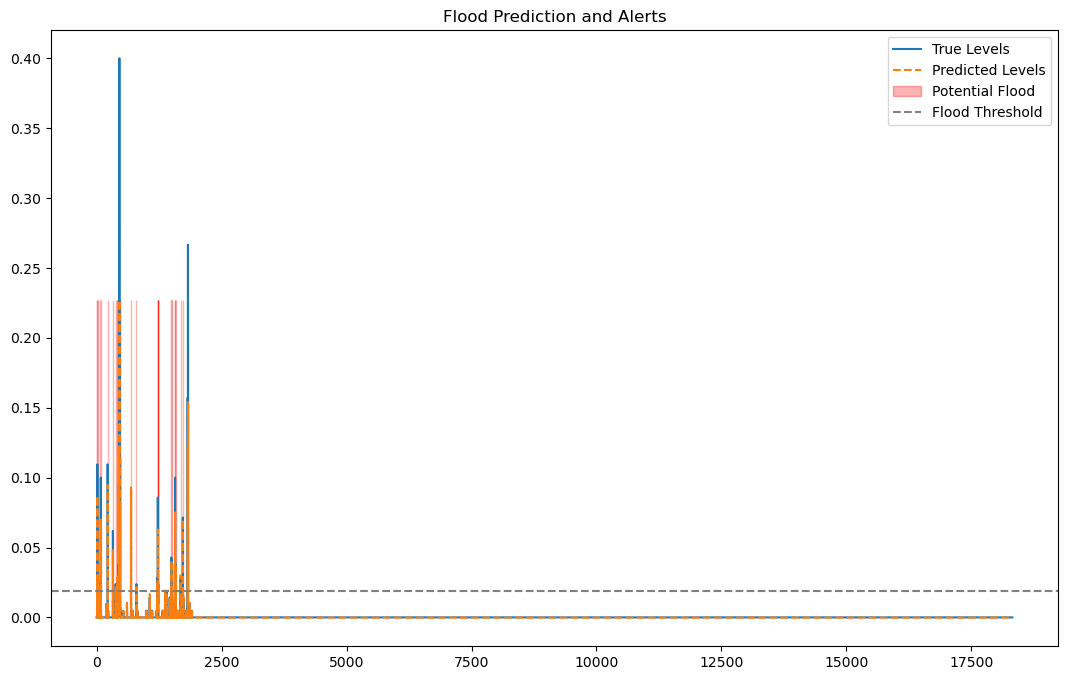

In [67]:
plt.figure(figsize=(13, 8))
plt.plot(y_test_original_scale, label='True Levels')
plt.plot(predictions_original_scale, label='Predicted Levels', linestyle='--')
plt.fill_between(np.arange(len(y_test_original_scale)), flood_threshold, predictions_original_scale[:, 0].max(), where=flood_alerts[:, 0], color='red', alpha=0.3, label='Potential Flood')
plt.axhline(flood_threshold, color='gray', linestyle='--', label='Flood Threshold')
plt.legend()
plt.title("Flood Prediction and Alerts")
plt.show()


# Step 32:
"Graphical Representation of Actual and Forecasted Water Levels Highlighting Potential Flooding Areas"






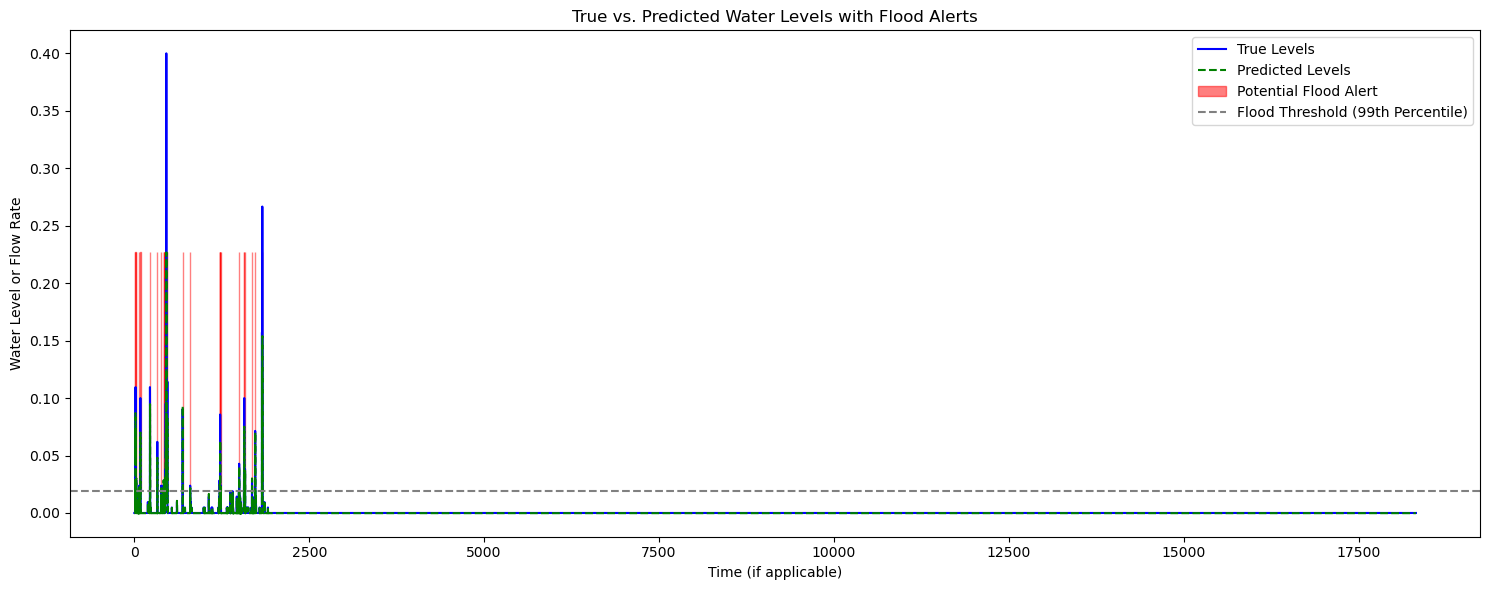

In [68]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(y_test_original_scale, label='True Levels', color='blue')
plt.plot(predictions_original_scale, label='Predicted Levels', linestyle='--', color='green')
plt.fill_between(np.arange(len(y_test_original_scale)), flood_threshold, predictions_original_scale[:, 0].max(), where=(predictions_original_scale[:, 0] > flood_threshold), color='red', alpha=0.5, label='Potential Flood Alert')
plt.axhline(flood_threshold, color='gray', linestyle='--', label=f'Flood Threshold (99th Percentile)')
plt.title('True vs. Predicted Water Levels with Flood Alerts')
plt.xlabel('Time (if applicable)')
plt.ylabel('Water Level or Flow Rate')
plt.legend()
plt.tight_layout()
plt.show()


# Overlaying on Original Data:

 Instead of plotting only the test period, we can overlay the predictions on the entire dataset to see how the model performs in continuity with historical data.

# Prediction Error Distribution:

 We can plot the distribution of prediction errors to understand the bias and variance in errors.

# Step 33:

"Visualizing the Distribution of Model Residuals"

In [69]:
residuals = y_test - predictions.flatten()


In [70]:
residuals

array([0.00015426, 0.00015426, 0.00015426, ..., 0.00015426, 0.00015426,
       0.00015426])

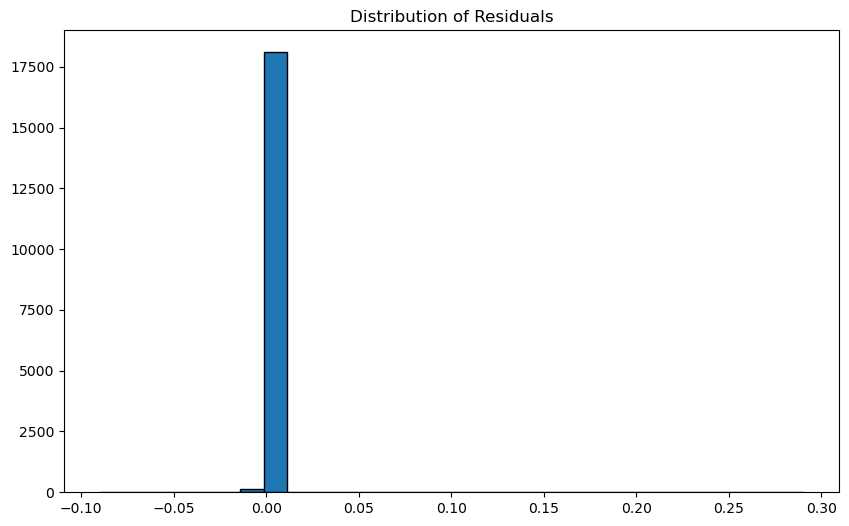

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Distribution of Residuals')
plt.show()


In [72]:
import plotly.express as px

fig = px.histogram(residuals, nbins=30, title='Distribution of Residuals')
fig.show()


# Interactive Plotting with Plotly or Bokeh:

#Libraries like Plotly and Bokeh allow for interactive plots where we can zoom, pan, and hover over data points to view values.

# Step 34:

"Interactive Plot of True vs. Predicted Values Using Plotly"

In [73]:
 import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=predictions.flatten(), mode='lines', name='Predicted'))
fig.show()

# Step 35:
"Saving the LSTM Model to Disk as 'my_lstm_model.h5'"

In [74]:
model.save('my_lstm_model.h5')


C:\Users\hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



# Step 36:
"Storing the LSTM Model to a Specified File"

In [75]:
model.save

<bound method Model.save of <keras.src.engine.sequential.Sequential object at 0x0000023A77384040>>

# Step 36:
"Loading the LSTM Model from Disk"

In [76]:
from keras.models import load_model

model = load_model('my_lstm_model.h5')


# Step 37:
"Displaying Model Architecture and Configuration"

In [77]:
model

# Step 38:
"Printing the Summary of the Loaded LSTM Model"

In [78]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10651 (41.61 KB)
Trainable params: 10651 (41.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Step 39:
"Generating Predictions for the Test Data Using the Loaded LSTM Model"

In [79]:
predictions = model.predict(X_test)


573/573 [==============================] - 3s 4ms/step


In [80]:
predictions = model.predict(X_test)


573/573 [==============================] - 2s 4ms/step


# Step 40:
"Evaluating Model Performance Using MAE, MSE, and RMSE Metrics"






In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.0004288480535719089
Mean Squared Error (MSE): 1.82266161913151e-05
Root Mean Squared Error (RMSE): 0.004269264127612053


# Step 41:
"Visual Comparison of Actual and Predicted Values on Test Data"

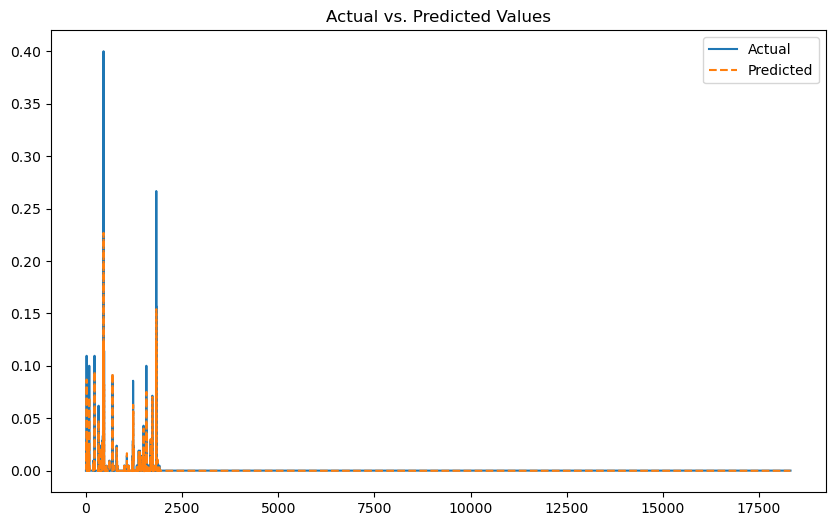

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted", linestyle="--")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.show()


# Project Description: Time-Series Forecasting for Flood Alerts
Objective:
Develop a machine learning model to predict water levels, and subsequently, use this prediction to alert for potential flood situations.

Data Processing:

Handling Missing Data: Employed techniques such as forward filling and replacement of blank spaces with NaN values.
Data Conversion: Excluded 'dateTime' and transformed other data columns into numeric formats.
Feature Scaling: Utilized MinMaxScaler to normalize the dataset, ensuring the model receives data in an optimal format.
Model Architecture:
Leveraged the LSTM (Long Short-Term Memory) neural network due to its aptness for time series forecasting. The network comprised of 50 LSTM units and a dense output layer.

Training and Evaluation:

Trained the model for 200 epochs with batch sizes of 32 using the Adam optimizer.
Evaluated the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to ensure its forecasting accuracy.
Visualization Tools:
Utilized both static (Matplotlib) and interactive (Plotly) plots to visualize the model's predictions compared to actual values and identify potential flood alerts.

Flood Alert System:
Established a flood threshold based on the 99th percentile of the dataset. When predicted water levels surpassed this threshold, an alert for potential flooding was raised, providing crucial early warnings.

Reproducibility:
To ensure reproducibility and future applicability, the trained LSTM model was saved and could be reloaded for subsequent predictions or evaluations.

Conclusion:
The project successfully developed an LSTM model capable of forecasting water levels and alerting for potential flood situations. This system stands as a promising tool for areas prone to floods, ensuring timely alerts and enabling preventive measures.